# **Lab Assignment 2 - Morgan Staples**
## 180016968
## https://github.com/MWS8StAndrews/PY4SA23_Assignment

# **Python Basics**
## **Task 1**
### An If...Else statement was created to test whether a number is divisible by 3. The number 303 was tested and was found to be divisible by three. The statement "303 is divisible by three" was then printed.

In [7]:
x = 303
if(x%3==0):
    print (str(x) + " is divisible by three")
else:
    print (str(x) + " is not divisible by three")

303 is divisible by three


## **Task 2**
### Another If...Else Statement was created that tested if a type of fruit was on a list of acceptable fruit. Mango was tested and since mango is not on the list of acceptable fruit the result "mango is not acceptable" was printed.

In [30]:
x = "mango"
fruitlst = ["apple", "orange", "pear", "kiwi", "strawberry"]
result = fruitlst.count(x)
if result > 0:
    print (x + " is acceptable")
else:
    print (x + " is not acceptable")

mango is not acceptable


## **Task 3**
### A function was created to calculate the distance between two coordinates using the haversine formula. After the formula was created different coordinates could be imputed to calculate the distance between locations.

In [40]:
import math
from math import sqrt, sin, cos, atan2, radians
def haversine(coord1:object, coord2:object):
    
    lon1, lat1 = coord1
    lon2, lat2 = coord2
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    
    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    R = 6371
    return R * c

coord1 = 0.96524,52.2213
coord2 = -0.10116,51.4567
print(haversine(coord1,coord2))

112.23072250319287


# **Pandas and NumPy**
## **Question 1**
### Using Pandas we can read the portland_park_trees.csv file. Subsets were created that identified the trees that are of the Quercus and Acer genus. The subsets were combined to create a subset that identified trees that belonged to the Quercus or Acer Genus. The len() function was then used to identify the number of rows and therefore trees that belonged to Quercus or Acer. This gave the answer 5675.

In [78]:
import pandas as pd

trees_df = pd.read_csv("data/portland_park_trees.csv", sep=",", header=0, encoding="ISO-8859-1")

Quercus_only = trees_df[trees_df["Genus"]=="Quercus"]
Acer_only = trees_df[trees_df["Genus"]=="Acer"]
Quercus_and_Acer = Quercus_only + Acer_only

print(len(Quercus_and_Acer))

5675


## **Question 2**
### Using the same data from the previous question subsets were created for trees that belonged to the Quercus genus and have a DBH larger than 50 inches. This process was repeated for the Acer genus and then the two subsets were combined. This gave the answer that there are 124 trees of the Quercus or Acer genus that have a DBH larger than 50 inches.

In [61]:
large_Quercus = trees_df[(trees_df["Genus"]=="Quercus") & (trees_df["DBH"]>50)]
large_Acer = trees_df[(trees_df["Genus"]=="Acer") & (trees_df["DBH"]>50)]

large_Quercus_and_Acer = large_Quercus + large_Acer

print(len(large_Quercus_and_Acer))

124


## **Question 3**
### Firstly a subset was created for the Fraxinus genus. Then a formula was created that would calculate the mean for each of the 3 different genus. The results were then published. From the results we can see that Quercus has the highest mean DBH.

In [68]:
Fraxinus_only = trees_df[trees_df["Genus"]=="Fraxinus"]

Quercus_Mean = Quercus_only["DBH"].mean()
Acer_Mean = Acer_only["DBH"].mean()
Fraxinus_Mean = Fraxinus_only["DBH"].mean()

print(Quercus_Mean)
print(Acer_Mean)
print(Fraxinus_Mean)

23.56823839157492
18.419085331846066
11.033609693877551


## **Question 4**
### A value count was used to count the amount of different species that belonged to the Acer genus. The result was then printed, which gave the answer 20.

In [84]:
Acer_difspecies = Acer_only["Genus_spec"].value_counts().shape[0]
print(Acer_difspecies)

20


## **Question 5**
### Firstly, pandas was used to read the file "world_cities.csv".

cities_df = pd.read_csv("data/world_cities.csv", sep=",", header=0, encoding="ISO-8859-1")

### A new column was created for population in millions. To convert the existing populations into millions the values had to be divided by 1000000.

In [91]:
cities_df["pop_M"] = cities_df["pop"] / 1000000

### The existing population column was then deleted.

In [93]:
del cities_df["pop"]

### Since my name begins with the letter M, I subsetted the city Mombasa. This result was then printed to identify the country that Mombasa was located in. The answer was Kenya.

In [97]:
just_Mombasa = cities_df[cities_df["city"]=="Mombasa"]
print (just_Mombasa)

          city country   lat    lon  capital   pop_M
24289  Mombasa   Kenya -4.04  39.66        0  0.8235


### The 5 cities with the largest populations in Kenya were subsetted using sort_values and .head(5). The results were then printed which told us that Nairobi, Mombasa, Nakuru, Eldoret and Kisumu were the 5 cities with the largest populations.

In [103]:
Kenya_cities = cities_df[cities_df["country"]=="Kenya"]
Kenya_cities_top5 = Kenya_cities.sort_values("pop_M", ascending=False).head(5)
print(Kenya_cities_top5)

          city country   lat    lon  capital     pop_M
25232  Nairobi   Kenya -1.29  36.82        1  2.864667
24289  Mombasa   Kenya -4.04  39.66        0  0.823500
25270   Nakuru   Kenya -0.28  36.07        0  0.266510
10562  Eldoret   Kenya  0.52  35.27        0  0.227818
18277   Kisumu   Kenya -0.09  34.75        0  0.220030


# **Python Data Visualisation**
## **Graph 1**

<AxesSubplot: xlabel='DBH', ylabel='TreeHeight'>

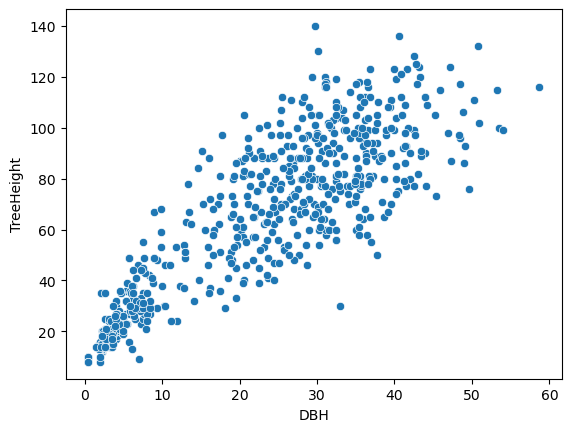

In [117]:
import seaborn as sns
Ulmus_only = trees_df[trees_df["Genus"]=="Ulmus"]
sns.scatterplot(x="DBH", y="TreeHeight", data=Ulmus_only)

## Graph 2

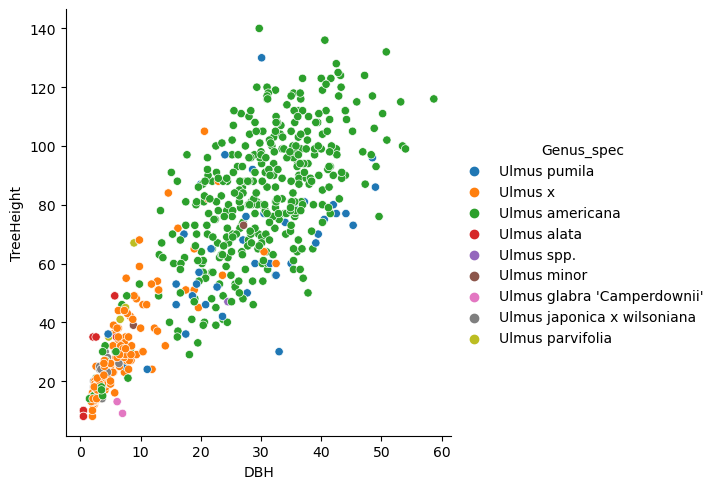

In [119]:
sns.relplot(x="DBH", y="TreeHeight", hue="Genus_spec", data=Ulmus_only)

## Graph 3

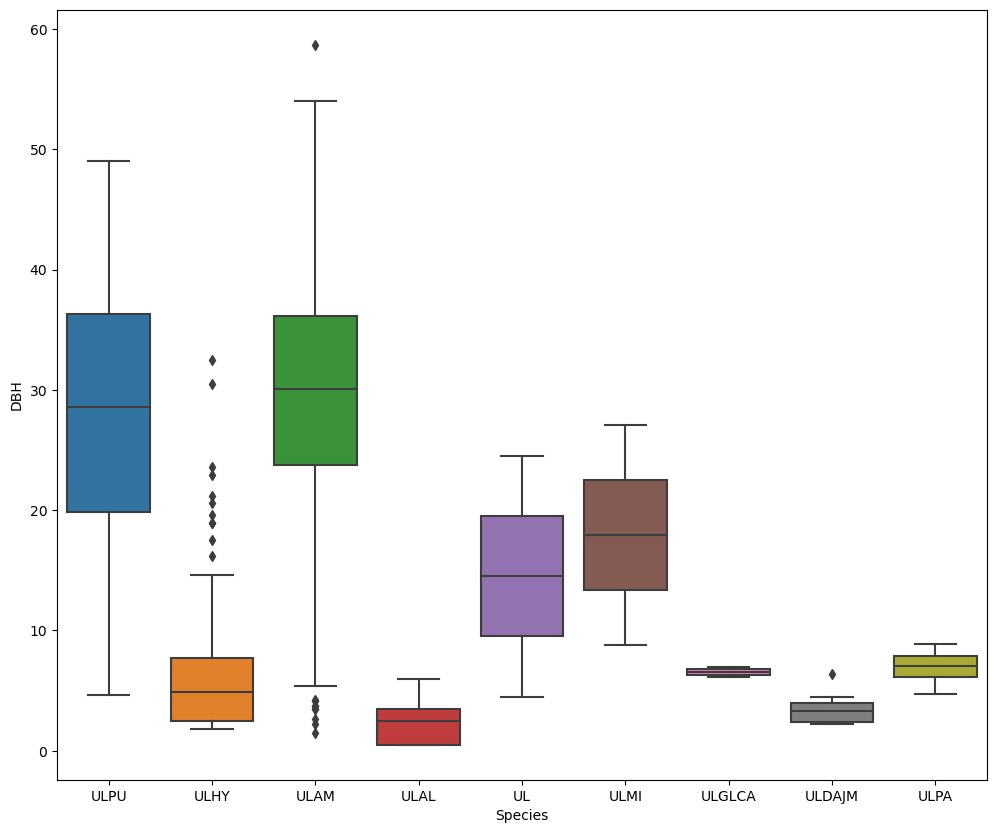

In [152]:
plt.figure(figsize =(12, 10))
sns.boxplot(data=Ulmus_only, x='Species', y='DBH')
plt.show()

## **Graph 4**